In [1]:
from empca_residuals import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/site-packages/setuptools-18.7.1-py2.7.egg/pkg_resources/__init__.py:1266: UserWarning: /home/price-jones/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).


In [2]:
n6819_12 = empca_residuals('apogee','clusters',maskFilter,ask=True)

Which data release? (Enter for 13): 12
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N6819
Data key: done


Done getting filter information
Total 0 of 30 stars missing


In [3]:
n6819_12.findResiduals(gen=True)

In [4]:
corr12 = n6819_12.findCorrection(numpix=30,savename='test.pkl')

In [5]:
n6819_13 = empca_residuals('apogee','clusters',maskFilter,ask=True)

Which data release? (Enter for 13): 13
Type done at any prompt when finished
Data key: CLUSTER
Default is full range. Match or slice? m
Match value: N6819
Data key: done


Done getting filter information
Total 0 of 30 stars missing


In [8]:
n6819_13.findResiduals(gen=True)

In [9]:
corr13 = n6819_13.findCorrection(numpix=30,savename='test.pkl')

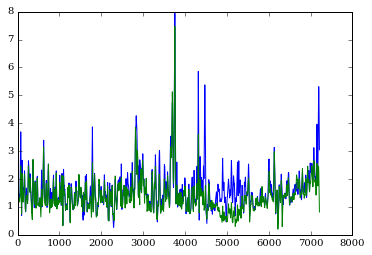

In [10]:
plt.plot(corr12)
plt.plot(corr13)